In [1]:
import math

def add(x, y):
    output = x.copy()
    for i in range(len(x)):
        output[i] += y[i]
    return output

In [2]:
    x = [i + 0. for i in range(4)]
    y = [i + 4. for i in range(4)]
    z = [i - 2. for i in range(4)]
    A = [[i * 4. + j for j in range(4)] for i in range(3)]
    print("************************************")

    print("test function of Sum of vectors")
    print("x =")
    print(x)
    print("y =")
    print(y)
    print("add(x, y) =")
    print(add(x, y))
    # print(x + y)
    print("************************************")

************************************
test function of Sum of vectors
x =
[0.0, 1.0, 2.0, 3.0]
y =
[4.0, 5.0, 6.0, 7.0]
add(x, y) =
[4.0, 6.0, 8.0, 10.0]
************************************


In [3]:
def matmul(A, x):
    """
    A: 行列
    B: 列ベクトル
    
    """
    output = [0] * len(A)
    for i in range(len(A)):
        for j in range(len(A[0])):
            output[i] += A[i][j]*x[j]
    return output


In [4]:
print("test function of Vector-matrix product")
print("A =")
print(A)
print("x =")
print(x)
print("matmul(A, x) =")
print(matmul(A, x))
# print(np.matmul(A, x))
print("************************************")

test function of Vector-matrix product
A =
[[0.0, 1.0, 2.0, 3.0], [4.0, 5.0, 6.0, 7.0], [8.0, 9.0, 10.0, 11.0]]
x =
[0.0, 1.0, 2.0, 3.0]
matmul(A, x) =
[14.0, 38.0, 62.0]
************************************


In [6]:
def transpose(A):
    """
    A[i][j]のiとjを入れ替える
    """
    # output = np.zeros([len(A[0]), len(A)])
    output = [[0 for j in range(len(A))] for i in range(len(A[0]))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            output[j][i] = A[i][j]
    return output

In [7]:
print("test function of Transpose")
print("A =")
print(A)
print("transpose(A) =")
print(transpose(A))
# print(np.transpose(A))
print("************************************")

test function of Transpose
A =
[[0.0, 1.0, 2.0, 3.0], [4.0, 5.0, 6.0, 7.0], [8.0, 9.0, 10.0, 11.0]]
transpose(A) =
[[0.0, 4.0, 8.0], [1.0, 5.0, 9.0], [2.0, 6.0, 10.0], [3.0, 7.0, 11.0]]
************************************


In [8]:
def relu(x):
    output = x.copy()
    for i in range(len(x)):
        if x[i]>0: output[i] = x[i]
        else: output[i] = 0
    return output

In [9]:
print("test function of ReLU")
print("z =")
print(z)
print("relu(z) =")
print(relu(z))
print("************************************")

test function of ReLU
z =
[-2.0, -1.0, 0.0, 1.0]
relu(z) =
[0, 0, 0, 1.0]
************************************


In [11]:
def softmax(x):
    sum = 0.
    for i in range(len(x)):
        sum += math.e ** x[i]
    output = x.copy()
    for i in range(len(x)):
        output[i] = math.e ** output[i] / sum
    return output

In [12]:
print("test function of Softmax")
print("x =")
print(x)
print("softmax(x) =")
print(softmax(x))
print("************************************")

test function of Softmax
x =
[0.0, 1.0, 2.0, 3.0]
softmax(x) =
[0.03205860328008499, 0.08714431874203257, 0.23688281808991013, 0.6439142598879722]
************************************


In [13]:
def backward(p, q):

    return output


In [14]:
print("test function of Backward")
print("x =")
print(x)
print("z =")
print(z)
print("backward(x, z) =")
print(backward(x, z))
print("************************************")

test function of Backward
x =
[0.0, 1.0, 2.0, 3.0]
z =
[-2.0, -1.0, 0.0, 1.0]
backward(x, z) =
[0, 0, 0, 3.0]
************************************


In [15]:
### 問題２
def load_pgm(path):
    lines = []
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            if i==0:
                lines.append(line)
            elif i==1 or i==2:
                lines.extend(list(map(int, line.split())))
            else:
                lines.extend(list(map(float, line.split())))
    # shape = lines[1:3]
    color_range = lines[3]
    factors = lines[4:]
    for i in range(len(factors)):
        factors[i] /= color_range
    # factors = np.array(factors)
    return factors

In [36]:
print("loading files...")
x = []
for i in range(154):
    x.append(load_pgm("pgm/{}.pgm".format(i+1)))
# print(x)

loading files...


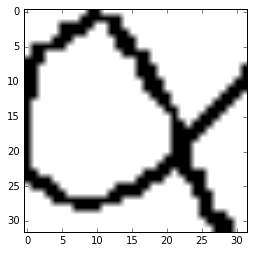

In [25]:
# debug
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x_img = np.array(x[10])
x_img = x_img.reshape(32,32)
plt.imshow(x_img, cmap='gray')
plt.show()


In [77]:
class Model():
    def __init__(self, path):
        H = 256
        N = 1024
        C = 23
        lines = []
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                lines.extend(list(map(float, line.split())))
        # lines = np.array(lines)
        self.W_1 = lines[:H*N]
        self.W_1 = [[self.W_1[i*N+j] for j in range(N)] for i in range(H)]
        # self.W_1 = np.array(self.W_1)
        self.b_1 = lines[H*N:H*N+H]
        self.W_2 = lines[H*N+H:H*N+H+H*H]
        self.W_2 = [[self.W_2[i*H+j] for j in range(H)] for i in range(H)]
        # self.W_2 = np.array(self.W_2)
        self.b_2 = lines[H*N+H+H*H:H*N+H+H*H+H]
        self.W_3 = lines[H*N+H+H*H+H:H*N+H+H*H+H+C*H]
        self.W_3 = [[self.W_3[i*H+j] for j in range(H)] for i in range(C)]
        # self.W_3 = np.array(self.W_3)
        self.b_3 = lines[H*N+H+H*H+H+C*H:H*N+H+H*H+H+C*H+C]

    def predict(self, x):
        self.a1 = add(matmul(self.W_1, x), self.b_1)
        h1 = relu(self.a1)
        self.a2 = add(matmul(self.W_2, h1), self.b_2)
        h2 = relu(self.a2)
        y = add(matmul(self.W_3, h2), self.b_3)
        fx = softmax(y)
        return fx
        

    def fgsm(self, x, y, epsilon0):
        fx = self.predict(x)
        minus_delta_t = [0] * 23
        minus_delta_t[y-1] = -1
        L_y = add(minus_delta_t, fx)
        L_h2 = matmul(transpose(self.W_3), L_y)
        L_a2 = backward(L_h2, self.a2)
        L_h1 = matmul(transpose(self.W_2), L_a2)
        L_a1 = backward(L_h1, self.a1)
        L_x = matmul(transpose(self.W_1), L_a1)

        # print("L_x shape", len(L_x))

        output = x.copy()
        for i in range(len(x)):
            output[i] += sign(L_x[i]) * epsilon0
            output[i] = max(output[i], 0)
            output[i] = min(output[i], 1)
            output[i] = float(int(output[i] * 255)) / 255
        return output

#     def fgsm2(self, x, y, k):

#         return output


In [78]:
print("test start")

# print(x)
# x = x.reshape(32,32)
# plt.imshow(x, cmap='gray')
# plt.show()

model = Model("param.txt")


test start


In [45]:
idx = 20
a1 = matmul(model.W_1, x[idx])
a1 = add(a1, model.b_1)
h1 = relu(a1)
a2 = add(matmul(model.W_2, h1), model.b_2)
h2 = relu(a2)
y = add(matmul(model.W_3, h2), model.b_3)
fx = softmax(y)
print(fx)

[6.316813048250015e-08, 0.9998546272103033, 2.76905397866881e-09, 3.6631527109617993e-09, 7.248534311619665e-10, 6.430005144622735e-08, 3.363732384981204e-05, 1.294180335174575e-06, 9.618258832171431e-13, 2.7722607420580954e-09, 2.9526090774473865e-07, 1.1901875732001697e-05, 3.4105047901063806e-11, 1.5108985744505541e-05, 2.637052476943142e-07, 2.457108386855454e-05, 2.3262266091275992e-09, 2.763376761825967e-13, 3.0173401803551736e-11, 5.769791953688263e-05, 9.92763820249738e-08, 3.633460419635933e-07, 4.280430655976815e-11]


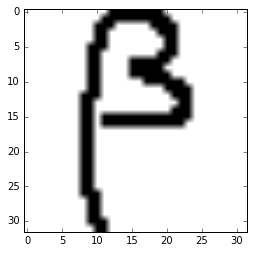

In [44]:
x_img = np.array(x[20])
x_img = x_img.reshape(32,32)
plt.imshow(x_img, cmap='gray')
plt.show()

In [85]:
def load_label(path):
    lines = []
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            lines.extend(list(map(int, line.split())))
    return lines

y = load_label("labels.txt")
print(y)


[15, 15, 15, 15, 15, 15, 15, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 17, 17, 17, 17, 17, 17, 17, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 9, 9, 9, 9, 10, 10]


In [111]:
print("predicting...")
y_pred = []
for i in range(len(x)):
    # print(i)
    y_pred.append(model.predict(x[i]))
#     print(y_pred[i])
# print(y_pred)

print("accuracy calculating...")
y_pred_label = []
for i in range(len(y_pred)):
    label = y_pred[i].index(max(y_pred[i])) + 1
    y_pred_label.append(label)
# print(y_pred_label)
# print(y)
acc = []
for i in range(len(y)):
    acc.append(y[i]==y_pred_label[i])
# print(acc)
acc = sum(acc) / len(acc)
print("accuracy:", acc)

predicting...
accuracy calculating...
accuracy: 0.8376623376623377


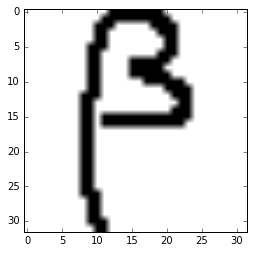

In [82]:
x_img = np.array(x[20])
x_img = x_img.reshape(32,32)
plt.imshow(x_img, cmap='gray')
plt.show()

In [105]:
import random

def sign(x):
    if x>0: return 1
    else: return -1
    

def backward(p, q):
    output = p.copy()
    for i in range(len(p)):
        if q[i]>0:
            output[i] = p[i]
        else:
            output[i] = 0
    return output

def random_noize(x, epsilon0):
    output = x.copy()
    for i in range(len(x)):
        output[i] += (random.randint(0,1) * 2 - 1) * epsilon0
    return output

0.9998546272103033
0.9998701087113765
0.010046524395570198


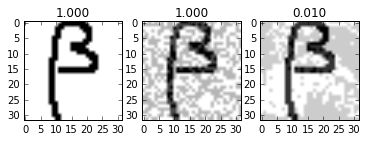

In [110]:
y_pred = model.predict(x[20])
print(y_pred[1])


x_random = random_noize(x[20], 0.2)
y_random_pred = model.predict(x_random)
print(y_random_pred[1])

x_fgsm = model.fgsm(x[20], y[20], 0.2)
y_fgsm_pred = model.predict(x_fgsm)
print(y_fgsm_pred[1])
y_fgsm_pred


# visualisze
plt.subplot(1,3,1)
x_img = np.array(x[20])
x_img = x_img.reshape(32,32)
plt.imshow(x_img, cmap='gray')
plt.title("{:.3f}".format(y_pred[1]))
          
plt.subplot(1,3,2)
x_img2 = np.array(x_random)
x_img2 = x_img2.reshape(32,32)
plt.imshow(x_img2, cmap='gray')
plt.title("{:.3f}".format(y_random_pred[1]))


plt.subplot(1,3,3)
x_img3 = np.array(x_fgsm)
x_img3 = x_img3.reshape(32,32)
plt.imshow(x_img3, cmap='gray')
plt.title("{:.3f}".format(y_fgsm_pred[1]))
plt.show()